epoch= 0 MSE= 0.6237526355552291
epoch= 1 MSE= 0.6270453364976881
epoch= 2 MSE= 0.6273362418162579
epoch= 3 MSE= 0.6273406771830929
epoch= 4 MSE= 0.6272487364607093
epoch= 5 MSE= 0.6267740199128193
epoch= 6 MSE= 0.624380840098718
epoch= 7 MSE= 0.6126467321912543
epoch= 8 MSE= 0.5621642000700579
epoch= 9 MSE= 0.431005072856598
epoch= 10 MSE= 0.3249793388454018
epoch= 11 MSE= 0.30301509155483297
epoch= 12 MSE= 0.299468068059131
epoch= 13 MSE= 0.29776952865770645
epoch= 14 MSE= 0.2962986682157904
epoch= 15 MSE= 0.29484700332538305
epoch= 16 MSE= 0.2933639792371533
epoch= 17 MSE= 0.2918231901846401
epoch= 18 MSE= 0.2902003766169871
epoch= 19 MSE= 0.2884688826727135
epoch= 20 MSE= 0.28659856366111947
epoch= 21 MSE= 0.2845555818329788
epoch= 22 MSE= 0.28230268727699775
epoch= 23 MSE= 0.27980002851025915
epoch= 24 MSE= 0.27700661951035555
epoch= 25 MSE= 0.2738825566546979
epoch= 26 MSE= 0.27039196705833296
epoch= 27 MSE= 0.2665064871856073
epoch= 28 MSE= 0.26220884675742145
epoch= 29 MSE= 0.2

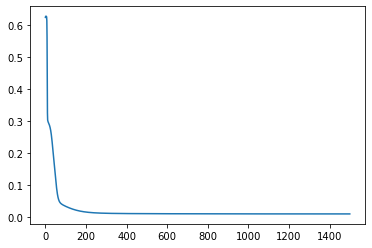

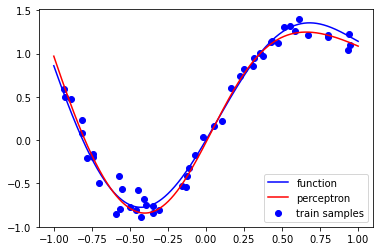

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:

    def __init__(self, N_neurons, f, f_der):
        self.f = f
        self.f_der = f_der
        self.in_weights = np.random.uniform(-0.0001, 0.0001, size=N_neurons)
        self.out_weights = np.random.uniform(-0.0001, 0.0001, size=N_neurons)
        self.in_bias = self.in_weights = np.random.uniform(-0.0001, 0.0001, size=N_neurons)
        self.out_bias = self.in_weights = np.random.uniform(-0.0001, 0.0001)
        self.in_weights_grad = None
        self.out_weights_grad = None
        self.in_bias_grad = None
        self.out_bias_grad = 1

    def out(self, x):
        linear_comb = self.in_weights * x + self.in_bias
        self.out_weights_grad = self.f(linear_comb)
        self.in_bias_grad = self.out_weights * self.f_der(linear_comb)
        self.in_weights_grad = self.in_bias_grad * x
        return self.f(linear_comb).dot(self.out_weights) + self.out_bias

    def fit_by_one_sample(self, x, y, h):
        delta = self.out(x) - y
        self.in_weights_grad *= delta
        self.out_weights_grad *= delta
        self.in_bias_grad *= delta
        self.out_bias_grad = delta
        self.in_weights -= h * self.in_weights_grad
        self.in_bias -= h * self.in_bias_grad
        self.out_weights -= h * self.out_weights_grad
        self.out_bias -= h * self.out_bias_grad

    def get_MSE(self, x, y):
        sum = 0
        for i in range(len(x)):
            sum += (y[i] - self.out(x[i]))**2
        return sum / len(x)

    def fit(self, x_train, y_train, h, epochs):
        errors = []
        for k in range(epochs):
            for i in range(len(x_train)):
                self.fit_by_one_sample(x_train[i], y_train[i], h)
            current_error = self.get_MSE(x_train, y_train)
            errors.append(current_error)
            print('epoch=', k, 'MSE=', current_error)
        plt.plot(range(epochs), errors, label='Error')
        plt.show()

    def plot(self, a, b):
        N = 100000
        x = np.linspace(a, b, N)
        y = np.zeros(N)
        for i in range(N):
            y[i] = self.out(x[i])
        plt.plot(x, y, label='perceptron', color='r')


def plot(f, a, b):
    N = 100000
    x = np.linspace(a, b, N)
    y = f(x)
    plt.plot(x, y, label='function', color='b')


def get_dataset(f, N, a, b):
    x = np.random.uniform(a, b, size=N)
    y = f(x) + np.random.normal(0, 0.1, size=N)
    return x, y


sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_der = lambda x: sigmoid(x) * (1 - sigmoid(x))
tanh = lambda x: np.tanh(x)
tanh_der = lambda x: 1 - np.square(np.tanh(x))

f = lambda x: x**2 + np.sin(3*x)
a = -1,
b = 1
dataset_size = 50

perceptron = Perceptron(10, tanh, tanh_der)
x_train, y_train = get_dataset(f, dataset_size, a, b)
perceptron.fit(x_train, y_train, h=0.05, epochs=1500)
plt.scatter(x_train, y_train, label='train samples', color='b')
plot(f, a, b)
perceptron.plot(a, b)
plt.legend()
plt.show()